In [1]:
! pip install pandas numpy scikit-learn nltk matplotlib seaborn wordcloud spacy flask openpyxl ydata_profiling textblob ipywidgets

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import LeaveOneOut, cross_val_score, RepeatedKFold, LeaveOneOut, KFold

import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import LeaveOneOut, cross_val_score, RepeatedKFold, LeaveOneOut, KFold

%matplotlib inline

In [3]:
# Cargamos los datos
ODS_Train_data = pd.read_csv('./dataset/ODScat_345.csv' , encoding='utf-8')
ODS_Test_data = pd.read_csv('./dataset/TestODScat_345.csv' , encoding='utf-8')

# 1. Entendimiento del negocio y enfoque analitico

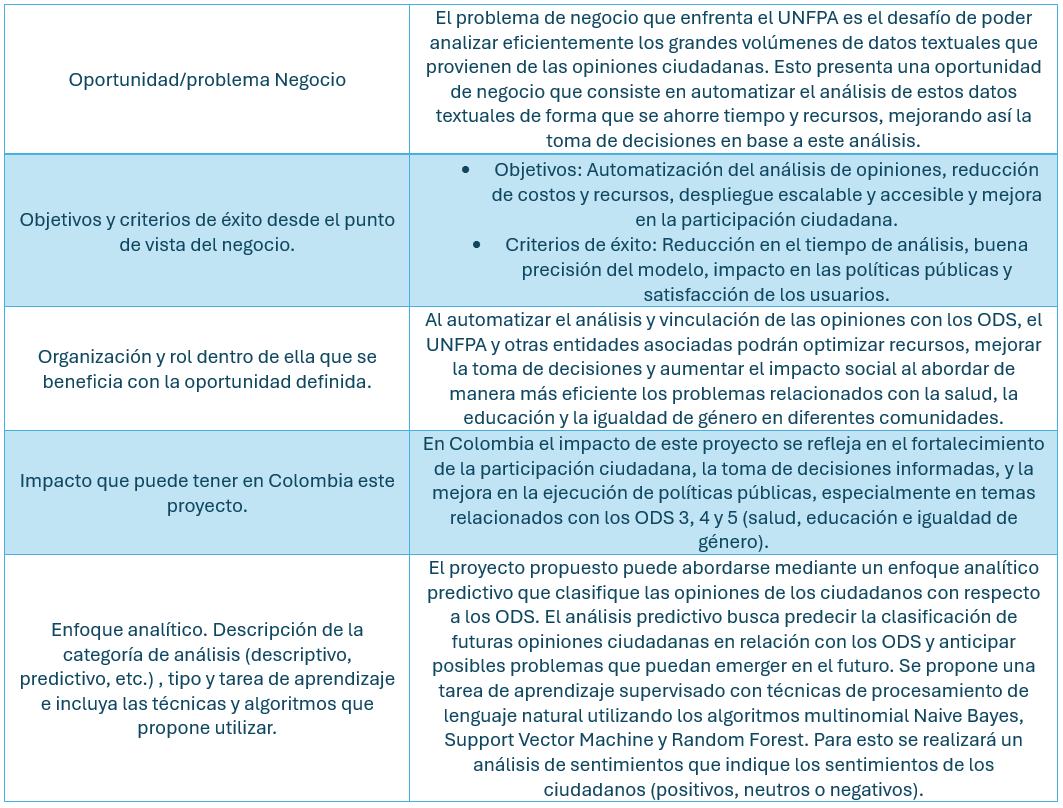


# 2. Entendimiento de los Datos

In [4]:
#Leemos el dataset ODScat_345
ODS_train_data = pd.read_csv('./dataset/ODScat_345.csv')
ODS_train_data.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


In [5]:
ODS_Test_data = pd.read_csv('./dataset/TestODScat_345.csv')
ODS_Test_data.head()

,Textos_espanol,sdg
0,Han examinado la contribuciÃ³n de las univers...,NaN
1,"En la última década, y en particular desde 201...",NaN
2,¿En qué países los estudiantes de alto rendimi...,NaN
3,A raíz de su preocupación por el hecho de que ...,NaN
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño nú...",NaN


In [6]:
ODS_train_data.shape

(4049, 2)

In [7]:
ODS_Test_data.shape

(702, 2)

In [8]:
ODS_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


In [9]:
ODS_Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [10]:
#Perfilamiento con ydata_profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(ODS_train_data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Datos estadísticos

In [11]:
from scipy import stats as st

textos = ODS_train_data.copy()
# Contar caracteres y palabras en la columna 'Textos_espanol'
total_caracteres = ODS_train_data['Textos_espanol'].str.len().sum()
total_palabras = ODS_Train_data['Textos_espanol'].str.split().str.len().sum()

# Imprimir los resultados
print(f'Total de caracteres: {total_caracteres}')
print(f'Total de palabras: {total_palabras}')

#Contar palabras por fila
textos['conteo'] = [len(x) for x in textos['Textos_espanol']]

#Calcular moda media y mediana con scipy
textos['Moda'] = [st.mode([len(word) for word in message.split(' ')], keepdims=True)[0][0] for message in textos['Textos_espanol']]
textos['Mediana'] = [int(np.median([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Media'] = [int(np.mean([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Rango'] = textos['Max'] - textos['Min']
textos['Desviacion'] = [int(np.std([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Varianza'] = [int(np.var([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Palabra_mas_frecuente'] = [Counter(message.split()).most_common(1)[0][0] for message in textos['Textos_espanol']]
textos['Frecuencia_palabra_mas_frecuente'] = [Counter(message.split()).most_common(1)[0][1] for message in textos['Textos_espanol']]
textos['Palabra_menos_frecuente'] = [Counter(message.split()).most_common()[-1][0] for message in textos['Textos_espanol']]
textos['Frecuencia_palabra_menos_frecuente'] = [Counter(message.split()).most_common()[-1][1] for message in textos['Textos_espanol']]

textos


Total de caracteres: 2832812
Total de palabras: 446612


,Textos_espanol,sdg,conteo,Moda,Mediana,Media,Max,Min,Rango,Desviacion,Varianza,Palabra_mas_frecuente,Frecuencia_palabra_mas_frecuente,Palabra_menos_frecuente,Frecuencia_palabra_menos_frecuente
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,2,3,4,18,1,17,3,11,de,16,SP.,1
1,"En 2007, el gobierno central financió directam...",3,476,2,4,5,14,1,13,3,9,del,4,hospitales.,1
2,"Claramente, hay muchos otros factores en juego...",3,1207,2,5,5,15,1,14,3,11,de,12,ODM.,1
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,2,5,5,17,1,16,3,13,de,15,interregionales.,1
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,2,3,4,13,1,12,2,6,de,19,15.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,2,4,5,16,1,15,3,14,de,12,género.,1
4045,La participación de las mujeres en roles de li...,5,514,2,5,5,16,1,15,3,12,de,9,Presidencial.,1
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,2,5,5,17,1,16,3,12,el,4,países.,1
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,2,4,5,15,1,14,3,10,de,17,Justicia.,1


Contando la frecuencia de cada palabra y determinando las más repetidas

In [12]:
# Unir todos los textos en una sola cadena
all_text = ' '.join(ODS_train_data['Textos_espanol'])

# Limpiar y dividir el texto en palabras
words = re.findall(r'\b\w+\b', all_text.lower())

# Contar la frecuencia de cada palabra
word_freq = Counter(words)

# Mostrar las 10 palabras más comunes
print(word_freq.most_common(10))

[('de', 37886), ('la', 20822), ('en', 15518), ('y', 15135), ('los', 13629), ('el', 11728), ('las', 10382), ('a', 8518), ('que', 8462), ('para', 5966)]


Distribución de la longitud de las palabras y KDE

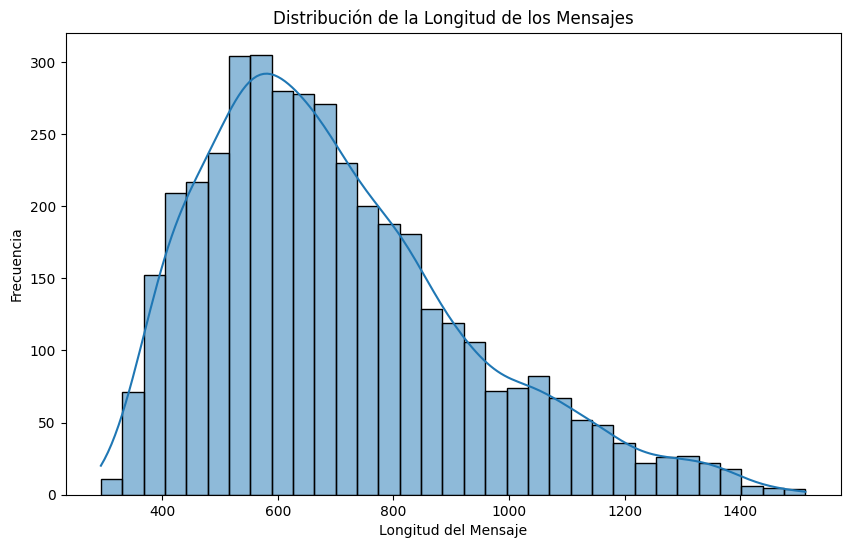

Asimetría: 0.8350624465488269, Curtosis: 0.32436533938895895


In [13]:
# 5. Visualización de la Distribución Usando Histogramas y KDE
plt.figure(figsize=(10, 6))
sns.histplot(textos['conteo'], kde=True)
plt.title('Distribución de la Longitud de los Mensajes')
plt.xlabel('Longitud del Mensaje')
plt.ylabel('Frecuencia')
plt.show()

# 6. Cálculo de la Asimetría (Skewness) y Curtosis (Kurtosis)
skewness = textos['conteo'].skew()
kurtosis = textos['conteo'].kurtosis()
print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

Distribución el número de palabras en los textos

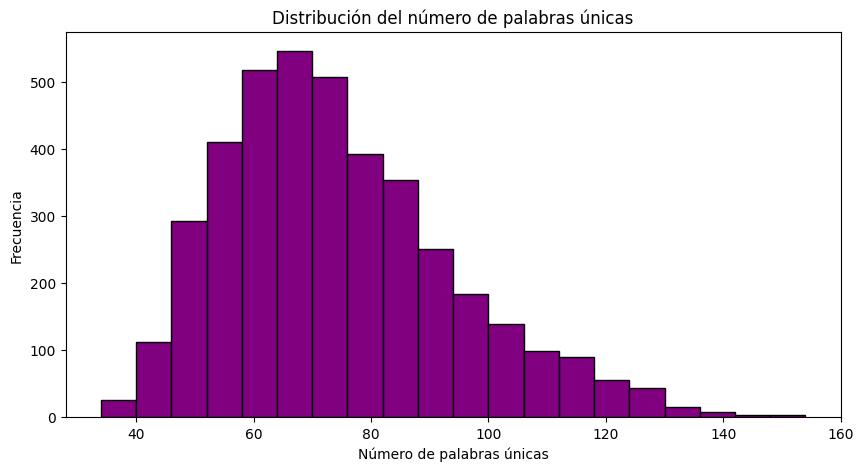

Asimetría: 0.8350624465488269, Curtosis: 0.32436533938895895


In [14]:
# Contar el número de palabras únicas en cada mensaje
textos['palabras_unicas'] = textos['Textos_espanol'].apply(lambda x: len(set(x.split())))

# Histograma de la distribución de palabras únicas
plt.figure(figsize=(10, 5))
plt.hist(textos['palabras_unicas'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución del número de palabras únicas')
plt.xlabel('Número de palabras únicas')
plt.ylabel('Frecuencia')
plt.show()
#Imprimir la asimetría y curtosis
print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

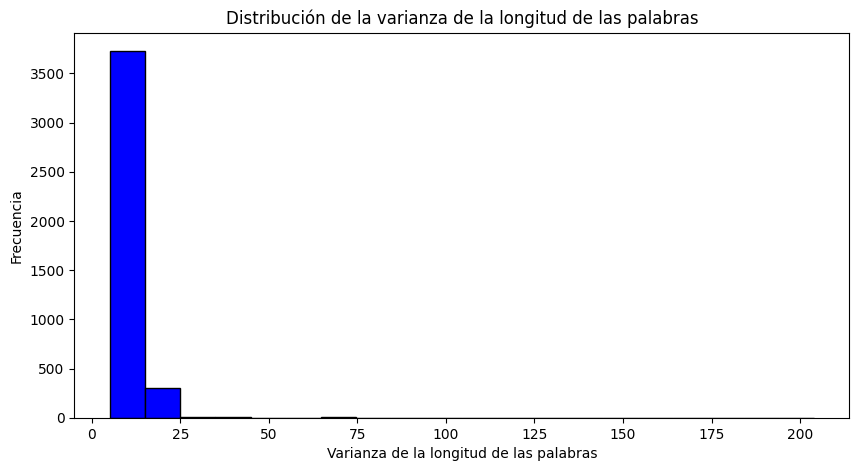

In [15]:
# Histograma de la distribución de la varianza de la longitud de las palabras
plt.figure(figsize=(10, 5))
plt.hist(textos['Varianza'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de la varianza de la longitud de las palabras')
plt.xlabel('Varianza de la longitud de las palabras')
plt.ylabel('Frecuencia')
plt.show()

N-Gramas más comunes en las palabras

In [16]:
# Función para mostrar los n-gramas más comunes
def mostrar_ngramas(corpus, ngram_range=(2, 2), num=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:num]

# Mostrar los 10 bigramas más comunes
print(mostrar_ngramas(textos['Textos_espanol'], ngram_range=(2, 2), num=10))

# Mostrar los 10 trigramas más comunes
print(mostrar_ngramas(textos['Textos_espanol'], ngram_range=(3, 3), num=10))

[('de la', 5300), ('de los', 3653), ('de las', 2614), ('en la', 2504), ('en el', 2201), ('las mujeres', 2105), ('de género', 1301), ('en los', 1123), ('de salud', 909), ('en las', 879)]
[('de las mujeres', 880), ('de la ocde', 643), ('de género en', 341), ('igualdad de género', 332), ('países de la', 316), ('de los estudiantes', 313), ('la igualdad de', 294), ('las mujeres en', 281), ('de la salud', 280), ('la mayoría de', 266)]


Nube de palabras más comunes

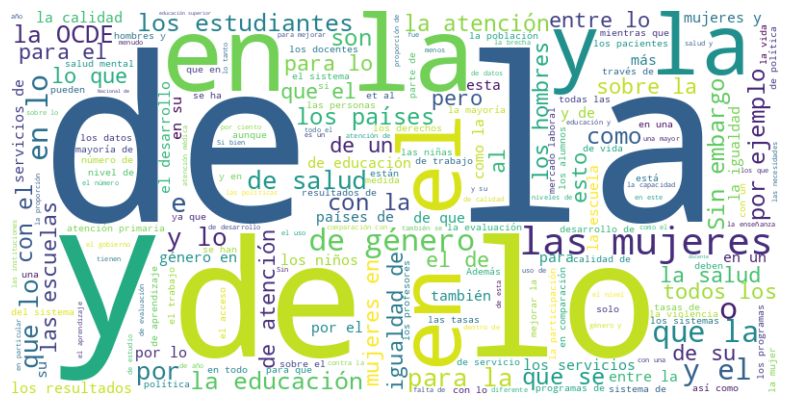

In [17]:
# Generar una nube de palabras
# Unir todos los textos en una sola cadena
all_text = ' '.join(ODS_train_data['Textos_espanol'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Análisis de sentimientos

Eje X (Sentimiento): Representa los valores de sentimiento. Estos valores generalmente oscilan entre -1 y 1:

* Valores negativos: Indican sentimientos negativos.
* Valores cercanos a 0: Indican sentimientos neutros.
* Valores positivos: Indican sentimientos positivos.

Eje Y (Frecuencia): Representa la cantidad de textos que tienen un determinado valor de sentimiento.

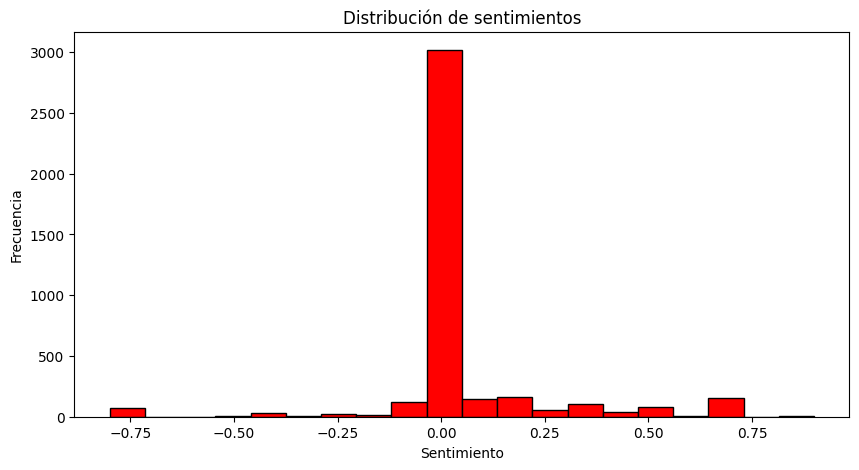

In [18]:
# Función para obtener el sentimiento de un texto
def obtener_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

# Aplicar la función a la columna de textos
textos['sentimiento'] = textos['Textos_espanol'].apply(obtener_sentimiento)

# Histograma de la distribución de sentimientos
plt.figure(figsize=(10, 5))
plt.hist(textos['sentimiento'], bins=20, color='red', edgecolor='black')
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# 3. Preparación de datos

In [19]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [20]:
# Hacemos una copia del dataset original para no modificar los datos originales
text_cleaned = ODS_train_data.copy()
text_cleaned_test = ODS_Test_data.copy()

# Función para limpiar caracteres especiales y codificaciones incorrectas
def clean_text(text):
    replacements = {
        'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú', 'Ã±': 'ñ',
        'Ã': 'í', 'Â': '', 'Ã¼': 'ü', 'â': '', '€': '', '™': ''
    }
    for old, new in replacements.items():
        text = text.replace(old, new)
    text = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]', '', text)
    return text

# Aplicar la función de limpieza a la columna de texto
text_cleaned['Textos_espanol'] = text_cleaned['Textos_espanol'].apply(clean_text)

# Eliminar espacios en blanco adicionales
text_cleaned['Textos_espanol'] = text_cleaned['Textos_espanol'].str.strip()

text_cleaned_test['Textos_espanol'] = text_cleaned_test['Textos_espanol'].apply(clean_text)

# Eliminar espacios en blanco adicionales
text_cleaned_test['Textos_espanol'] = text_cleaned_test['Textos_espanol'].str.strip()

# Función para eliminar caracteres no ASCII
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

# Función para convertir a minúsculas
def to_lowercase(words):
    return [word.lower() for word in words if word is not None]

# Función para eliminar puntuación
def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

# Función para eliminar stopwords
def remove_stopwords(words):
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word is not None and word.lower() not in stop_words]

# Función para obtener la etiqueta de parte del discurso (POS) para lematización
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Crear el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar las palabras
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]


# Función de preprocesamiento
def preprocessing(text):
    words = word_tokenize(text)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = lemmatize_words(words)
    return ' '.join(words)

text_cleaned['cleaned_text'] = text_cleaned['Textos_espanol'].apply(lambda x: preprocessing(x))

text_cleaned_test['cleaned_text'] = text_cleaned_test['Textos_espanol'].apply(lambda x: preprocessing(x))

In [21]:
text_cleaned.head(10)

,Textos_espanol,sdg,cleaned_text
0,Por ejemplo el número de consultas externas de...,3,ejemplo numero consultas externas especialista...
1,En el gobierno central financió directamente ...,3,gobierno central financio directamente solo ga...
2,Claramente hay muchos otros factores en juego ...,3,claramente factores juego particular variedad ...
3,Por ejemplo el estado australiano de Victoria ...,3,ejemplo australiano victoria creo agencia prom...
4,El consumo anual de alcohol se estima en litr...,3,consumo anual alcohol estima litros ano hombre...
5,Probar pronto la medicina rural puede crear el...,3,probar pronto medicina rural puede crear deseo...
6,La duración media de la estancia en el hospita...,3,duracion medium estancia hospital alos utiliza...
7,El período retrospectivo es de años de a Lo...,3,periodo retrospectivo ano precios incluyen tec...
8,Ya se están vinculando algunos datos de los re...,3,estan vinculando datos registros incluidos rel...
9,En este sentido es una forma eficaz de mejorar...,3,forma eficaz mejorar eficacia calidad servicio...


# 4. Modelado y Evaluación

# 4.1 Creación de modelos

In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(text_cleaned['cleaned_text'], text_cleaned['sdg'], test_size=0.2, random_state=42)

# Convertir el texto en una matriz de características
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Modelo 1

In [23]:
# Crear y entrenar el modelo Multinomial Naive Bayes
modelnb = MultinomialNB()
modelnb.fit(X_train_vec, y_train)

# Evaluar el modelo
y_pred = modelnb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9728395061728395
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.95      0.98       250
           4       0.97      0.98      0.98       268
           5       0.95      0.98      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



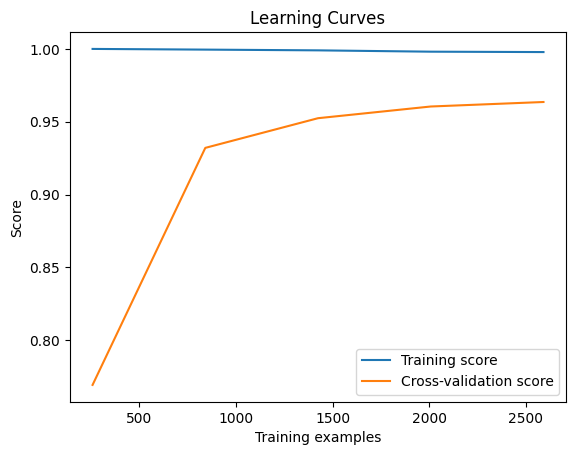

In [24]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelnb, X_train_vec, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular las medias de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [25]:
# Evaluar usando validación cruzada
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())

Scores de validación cruzada: [0.9691358  0.96296296 0.96759259 0.95987654 0.95826893]
Promedio de los scores: 0.9635673669547961


In [26]:
# Evaluar usando Kfold Cross-Validation
kf = KFold(n_splits=5)
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=kf, scoring='accuracy')
print("Scores de K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de K-Fold Cross-Validation: [0.9691358  0.96604938 0.95216049 0.95679012 0.96599691]
Promedio de los scores: 0.9620265422558056


In [27]:
# Evaluar usando Leave-One-Out Cross-Validation
loo = LeaveOneOut()
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=loo, scoring='accuracy')
print("Scores de Leave-One-Out Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de Leave-One-Out Cross-Validation: [1. 1. 1. ... 1. 1. 1.]
Promedio de los scores: 0.9617165791911083


In [28]:
# Evaluar usando Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=rkf, scoring='accuracy')
print("Scores de Repeated K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de Repeated K-Fold Cross-Validation: [0.95679012 0.95524691 0.97376543 0.95987654 0.95363215 0.97222222
 0.94444444 0.9537037  0.96141975 0.96599691 0.96759259 0.9537037
 0.95524691 0.95833333 0.96599691 0.94753086 0.97067901 0.97222222
 0.95679012 0.95672334 0.96296296 0.96450617 0.96604938 0.95679012
 0.94899536 0.95061728 0.96759259 0.95061728 0.97067901 0.95981453
 0.9537037  0.94444444 0.96450617 0.97376543 0.9690881  0.95679012
 0.95524691 0.96296296 0.96141975 0.95981453 0.96759259 0.94907407
 0.95216049 0.97530864 0.95363215 0.97222222 0.96141975 0.94598765
 0.95833333 0.9690881 ]
Promedio de los scores: 0.9601420611750339


Modelo 2

In [38]:
# Crear y entrenar el modelo SVM
modelsvn = SVC(kernel='linear')
modelsvn.fit(X_train_vec, y_train)

y_pred = modelsvn.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9839506172839506
Classification Report:
              precision    recall  f1-score   support

           3       0.99      0.98      0.99       250
           4       0.98      0.99      0.98       268
           5       0.98      0.99      0.98       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



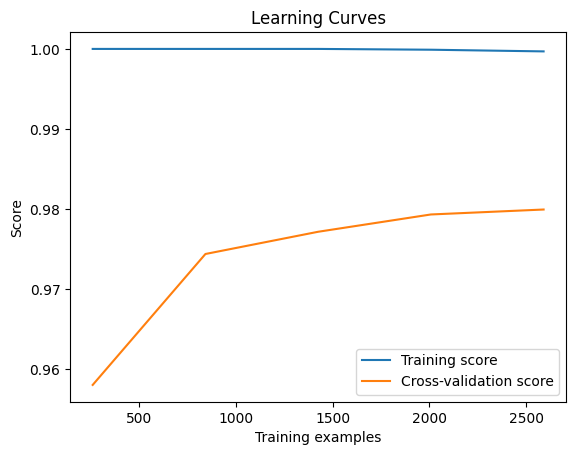

In [37]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelsvn, X_train_vec, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular las medias de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [31]:
# Evaluar usando validación cruzada
scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())

Scores de validación cruzada: [0.98611111 0.97685185 0.97839506 0.98302469 0.97527048]
Promedio de los scores: 0.9799306390367699


In [32]:
# Evaluar usando Kfold Cross-Validation
kf = KFold(n_splits=5)
scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=kf, scoring='accuracy')
print("Scores de K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de K-Fold Cross-Validation: [0.98611111 0.97993827 0.97685185 0.98611111 0.97527048]
Promedio de los scores: 0.9808565649626958


In [ ]:
# Evaluar usando Leave-One-Out Cross-Validation
loo = LeaveOneOut()
scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=loo, scoring='accuracy')
print("Scores de Leave-One-Out Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

In [40]:
# Evaluar usando Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=rkf, scoring='accuracy')
print("Scores de Repeated K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de Repeated K-Fold Cross-Validation: [0.97839506 0.97376543 0.9845679  0.97685185 0.98763524 0.97530864
 0.97993827 0.97993827 0.97839506 0.98299845 0.97839506 0.97530864
 0.97993827 0.98765432 0.98763524 0.97530864 0.98765432 0.98302469
 0.98148148 0.98763524 0.97530864 0.98765432 0.98919753 0.98148148
 0.97527048 0.98302469 0.9845679  0.97530864 0.97685185 0.98145286
 0.97839506 0.9691358  0.98611111 0.98302469 0.97990726 0.98148148
 0.97839506 0.98148148 0.98148148 0.97217929 0.97993827 0.97530864
 0.97839506 0.98302469 0.98299845 0.98611111 0.97685185 0.97685185
 0.97839506 0.98299845]
Promedio de los scores: 0.9804882935485719


Modelo 3

In [41]:
# Crear y entrenar el modelo Random Forest Classifier
modelrf = RandomForestClassifier(random_state=42, n_estimators=100)
modelrf.fit(X_train_vec, y_train)


y_pred = modelrf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       250
           4       0.95      0.97      0.96       268
           5       0.96      0.95      0.95       292

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



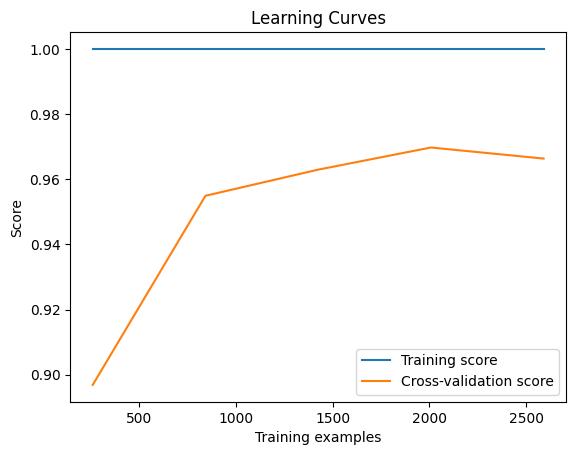

In [42]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelrf, X_train_vec, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular las medias de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [43]:
# Evaluar usando validación cruzada
scores = cross_val_score(modelrf, X_train_vec, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())

Scores de validación cruzada: [0.96604938 0.95987654 0.96604938 0.96759259 0.97063369]
Promedio de los scores: 0.9660403190413496


In [44]:
# Evaluar usando Kfold Cross-Validation
kf = KFold(n_splits=5)
scores = cross_val_score(modelrf, X_train_vec, y_train, cv=kf, scoring='accuracy')
print("Scores de K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de K-Fold Cross-Validation: [0.9691358  0.97222222 0.96296296 0.97685185 0.97527048]
Promedio de los scores: 0.9712886637281277


In [ ]:
# Evaluar usando Leave-One-Out Cross-Validation
loo = LeaveOneOut()
scores = cross_val_score(modelrf, X_train_vec, y_train, cv=loo, scoring='accuracy')
print("Scores de Leave-One-Out Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

In [46]:
# Evaluar usando Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(modelrf, X_train_vec, y_train, cv=rkf, scoring='accuracy')
print("Scores de Repeated K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de Repeated K-Fold Cross-Validation: [0.9691358  0.95987654 0.9691358  0.96450617 0.97063369 0.97067901
 0.96450617 0.97530864 0.97685185 0.97372488 0.97067901 0.97222222
 0.95679012 0.98302469 0.96599691 0.97067901 0.97067901 0.97067901
 0.95524691 0.9690881  0.97222222 0.97839506 0.9691358  0.95833333
 0.96445131 0.97530864 0.97376543 0.95987654 0.96450617 0.97836167
 0.97376543 0.95833333 0.97376543 0.97685185 0.97063369 0.98302469
 0.9691358  0.97376543 0.9691358  0.9675425  0.97530864 0.95987654
 0.96604938 0.96759259 0.9690881  0.96296296 0.97376543 0.97685185
 0.96604938 0.97372488]
Promedio de los scores: 0.9696204705478276


# 5.  Resultados


# 6. Mapa de actores relacionado con el producto de datos creado.

# 7. Trabajo en Equipo

|Integrante|Rol|Horas de trabajo|Retos|Algoritmo|Puntos|
|----|----|----|----|----|----|
|Camilo Morillo|Lider de negocio|3 horas|Justificar las decisiones de negocio tomadas y definir las oportunidades de negocio|Random Forest Classifier|25|
|||||||
|||||||